In [1]:
import sys
# sys.path.append('/Users/chandrasekharmukherjee/Home/Centrality framework/MCPC_Clustering/Codes')
sys.path.append('I:/내 드라이브/backup/document/USC/Research/MCPC/Code/Codes')

In [7]:
# This code is to test Louvain Method with custom Modularity Function
import numpy as np
import networkx as nx
import networkx.algorithms.community.quality as nx_quality
import networkx.algorithms.community as nx_comm
# from Custom_Func import directed_modularity, modularity, _one_level

import Custom_Func as Custom_Func


In [8]:
%load_ext autoreload
%autoreload 2
import importlib
import Custom_Func as Custom_Func
Custom_Func = importlib.reload(Custom_Func)

## Sample Graph

In [ ]:
G = nx.karate_club_graph()
print(G.edges())

In [ ]:
G = nx.karate_club_graph()
#visualize
nx.draw(G, with_labels=True)
#print(G.edges(data=True))

## Louvain Method with Original Q (Modularity) Function

In [ ]:
#Louvain with Normal Q 
partition = nx_comm.louvain.louvain_partitions(G, seed=0)
#Loop through the partition. It is a list of sets
for i, s in enumerate(partition, start=1):
    print(f"Set {i}: {s}")

## Louvain Method with Custom Q (Modularity) Function using Monkey Patch (Overload)

UnboundLocalError: local variable 'Q_c' referenced before assignment

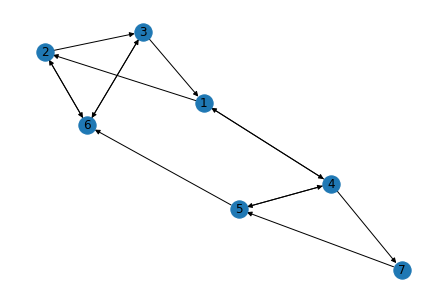

In [18]:
#Louvain with Custom Q (+1 for every community of size 2 / 0 else)
nx_quality.modularity=modularity
nx_comm.louvain._one_level=_one_level
partition = nx_comm.louvain.louvain_partitions(G, seed=0)
#Loop through the partition. It is a list of sets
for i, s in enumerate(partition, start=1):
    print(f"Set {i}: {s}")
#


    

# Directed Graph

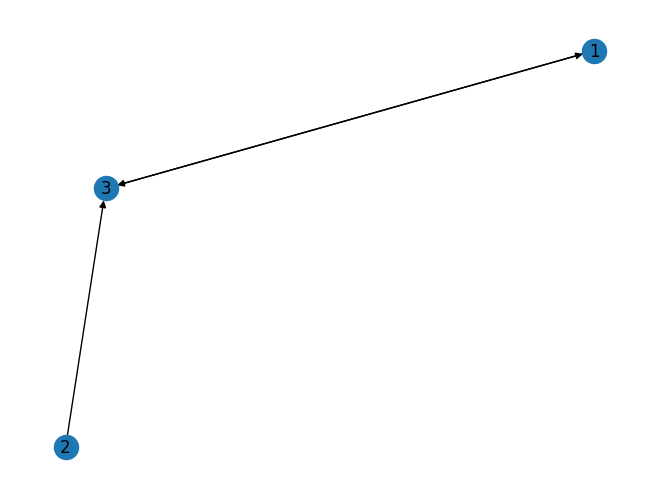

In [70]:
#Directed graph example

n_s=100
val = np.random.uniform(low=0.0, high=1.0, size=(n_s, n_s))

G = nx.DiGraph()

for i in range(n_s):
    for j in range(n_s):

        if((i<n_s//2 and j <n_s//2) or (i>n_s//2 and j>n_s//2)):
            if(val[i][j]>0.3):
                G.add_edge(i,j,weight=1)
        else:
            if(val[i][j]>0.7):
                G.add_edge(i,j,weight=1)


#G.add_edges_from([(1,2),(2,3),(3,1),(1,4),(4,1),(4,5),(5,4),(5,6),(6,3),(3,6),(6,2),(2,6),(4,7),(7,5),(7,4)])
# G = nx.DiGraph()
# G.add_nodes_from([1,2,3])
# G.add_edges_from([(2,3),(1,3),(3,1)])#visualize
nx.draw(G, with_labels=True)

## Original Directed_Modularity

In [85]:
import debug as debug
nx_comm.louvain._one_level=debug._one_level
# nx_quality.modularity=directed_modularity

#Custom directed modularity
# Q_c = 1 if nodes in community c have more than 2 inter-community edges, 0 otherwise
# Q = sum of all Q_c for all community c

#Set every edge weight to 1
# for u,v in G.edges():
#     G[u][v]['weight']=1

#print the edge weights
#print(G.edges(data=True))

partition = nx_comm.louvain.louvain_partitions(G, seed=0)
#Loop through the partition. It is a list of sets
for i, s in enumerate(partition, start=1):
    print(f"Set {i}: {s}")

rand_nodes: [1, 3, 2]
weights2com: defaultdict(<class 'float'>, {2: 2.0})
check u:1
check nbr_com: 2
check u:1
check nbr_com: 0
weights2com: defaultdict(<class 'float'>, {2: 2.0, 1: 1.0})
check u:3
check nbr_com: 2
check u:3
check nbr_com: 1
weights2com: defaultdict(<class 'float'>, {2: 1.0})
check u:2
check nbr_com: 2
check u:2
check nbr_com: 1
weights2com: defaultdict(<class 'float'>, {2: 2.0})
check u:1
check nbr_com: 2
weights2com: defaultdict(<class 'float'>, {2: 2.0, 1: 1.0})
check u:3
check nbr_com: 2
check u:3
check nbr_com: 1
weights2com: defaultdict(<class 'float'>, {2: 1.0})
check u:2
check nbr_com: 2
check u:2
check nbr_com: 1
Set 1: [{2}, {1, 3}]
rand_nodes: [1, 0]
weights2com: defaultdict(<class 'float'>, {0: 1.0})
check u:1
check nbr_com: 0
check u:1
check nbr_com: 1
weights2com: defaultdict(<class 'float'>, {1: 1.0})
check u:0
check nbr_com: 1
check u:0
check nbr_com: 0


## Custom Directed Modularity

In [84]:
custom_partition = Custom_Func.louvain_partitions(G, seed=0)
for i, s in enumerate(custom_partition, start=1):
    print(f"Set {i}: {s}")

nbrs: {1: defaultdict(<class 'float'>, {3: 2.0}), 2: defaultdict(<class 'float'>, {3: 1.0}), 3: defaultdict(<class 'float'>, {1: 2.0, 2: 1.0})}
rand_nodes: [1, 3, 2]
weights2com: defaultdict(<class 'float'>, {2: 2.0})
check u:1
check nbr_com: 2
weights2com: defaultdict(<class 'float'>, {0: 2.0, 1: 1.0})
check u:3
check nbr_com: 0
check u:3
check nbr_com: 1
weights2com: defaultdict(<class 'float'>, {2: 1.0})
check u:2
check nbr_com: 2
Set 1: [{1}, {2}, {3}]
